# 機械学習 第1回　レポート課題



## はじめに

本レポートでは, 以下のデータセットと手法を用いて機械学習を行う.

- データセット:
    https://www.kaggle.com/c/titanic/data ここからDLしてきたtrain.csvをデータセットtest.csvをテストデータとする.
    
    これらのデータセットは, タイタニック号での乗客情報とその生存, 非生存を表したデータである.
    
    train.csvのデータ数は891個, test.csvでは418個なっている.
    
- 特徴:
    元のデータの特徴は以下のようになっている.
    <table>
    <tbody>
    <tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
    <tr>
    <td>survival</td>
    <td>Survival</td>
    <td>0 = No, 1 = Yes</td>
    </tr>
    <tr>
    <td>pclass</td>
    <td>Ticket class</td>
    <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
    </tr>
    <tr>
    <td>sex</td>
    <td>Sex</td>
    <td></td>
    </tr>
    <tr>
    <td>Age</td>
    <td>Age in years</td>
    <td></td>
    </tr>
    <tr>
    <td>sibsp</td>
    <td># of siblings / spouses aboard the Titanic</td>
    <td></td>
    </tr>
    <tr>
    <td>parch</td>
    <td># of parents / children aboard the Titanic</td>
    <td></td>
    </tr>
    <tr>
    <td>ticket</td>
    <td>Ticket number</td>
    <td></td>
    </tr>
    <tr>
    <td>fare</td>
    <td>Passenger fare</td>
    <td></td>
    </tr>
    <tr>
    <td>cabin</td>
    <td>Cabin number</td>
    <td></td>
    </tr>
    <tr>
    <td>embarked</td>
    <td>Port of Embarkation</td>
    <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
    <tr>
    <td>PassengerId</td>
    <td>passenger id</td>
    </tr>
    <tr>
    <td>Name</td>
    <td>Passenger name</td>
    </tr>
    </tbody>
    </table>
    
    
    

## データの前処理

この節では, データセットの前処理について述べる. 

### 欠損
今回のデータでは以下のような欠損があります. 
- train.csvの欠損の数

欠損がある属性 | 欠損の個数
--- | ---
Age | 177
 Cabin |  687

- test.csvの欠損の数

欠損がある属性 | 欠損の個数
--- | ---
Age | 86
Fare | 1
 Cabin |  327
 
これらは, 学習する際邪魔になるので, 削除もしくは適当な値で埋めます.



### 特徴の変更と追加と削除

学習のために特徴を追加または削除します.

- 変更する特徴
    - Sexの値をmaleを0にfemaleを1に変更.
   
- 削除する特徴
    - Ticket
    - Cabin
    - Embarked
    - Name

- 追加する特徴
    - FamillySize: 家族の人数
    - IsAlone: 独身かどうか
    - HonorificTitle: 敬称
    - IsChild: 子供かどうか

## コード
この節以降は, コードについて記載する.

In [2]:
# このセルではデータの前処理を行う
import pandas as pd 
import numpy as np
"""
それぞれのデータのsexの値を(male=0, female=1)のように置き換える.
"""
train= pd.read_csv("train.csv").replace("male",0).replace("female",1)
test= pd.read_csv("test.csv").replace("male",0).replace("female",1)

"""
今回使わないデータを削除.
"""
del(train["Ticket"])
del(train["Cabin"])
del(train["Embarked"])
del(test["Ticket"])
del(test["Cabin"])
del(test["Embarked"])

"""
家族の人数(FamillySize)と独身(isAlone)であるかの特徴を追加.
"""
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
for t in [train]:
    t['IsAlone'] = 0
    t.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
    
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
for t in [test]:
    t['IsAlone'] = 0
    t.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

"""
欠損値をそれぞれの方法で埋める.
"""
# 名前の敬称を使って, 新たに特徴を加え名前の特徴を消す.
for t in [train]: 
        t['HonorificTitle'] = train.Name.str.extract(' ([A-Za-z]+).', expand=False) 
for t in [train]: 
        t['HonorificTitle'] = train['HonorificTitle'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        t['HonorificTitle'] = train['HonorificTitle'].replace('Mlle', 'Miss')
        t['HonorificTitle'] = train['HonorificTitle'].replace('Ms', 'Miss')
        t['HonorificTitle'] = train['HonorificTitle'].replace('Mme', 'Mrs')
        del train['Name']
HonorificTitle_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
for t in [train]: 
        t['HonorificTitle'] = train['HonorificTitle'].map(HonorificTitle_mapping) 
        t['HonorificTitle'] = train['HonorificTitle'].fillna(0)

# 敬称からその敬称の年齢の平均を求めて, それを利用して欠損値を埋める.
for i in range(0,6):
    train['Age'].fillna(train[train['HonorificTitle'] == i]['Age'].dropna().mean(), inplace=True)

# trainも同様に
for t in [test]: 
        t['HonorificTitle'] = test.Name.str.extract(' ([A-Za-z]+).', expand=False) 
for t in [test]: 
        t['HonorificTitle'] = test['HonorificTitle'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        t['HonorificTitle'] = test['HonorificTitle'].replace('Mlle', 'Miss')
        t['HonorificTitle'] = test['HonorificTitle'].replace('Ms', 'Miss')
        t['HonorificTitle'] = test['HonorificTitle'].replace('Mme', 'Mrs')
        del test['Name']
HonorificTitle_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
for t in [test]: 
        t['HonorificTitle'] = test['HonorificTitle'].map(HonorificTitle_mapping) 
        t['HonorificTitle'] = test['HonorificTitle'].fillna(0)

for i in range(0,6):
    test['Age'].fillna(test[test['HonorificTitle'] == i]['Age'].mean(), inplace=True)

# 子供であるかどうかの特徴の追加.
for t in [train]:
    t['IsChild'] = 0
    t.loc[train['Age'] < 18, 'IsChild'] = 1

for t in [test]:
    t['IsChild'] = 0
    t.loc[test['Age'] < 18, 'IsChild'] = 1

test["Fare"].fillna(train.Fare.mean(), inplace=True) # 1つだけ欠損しているため.

# 情報の確認用.
# print(train.head(10))
# train.info()
# test.info()

train_data = train.values
X_train = train_data[:, 2:] # Pclass以降の変数.訓練データ.
Y_train  = train_data[:, 1]  # 正解データ

test_data = test.values
X_test = test_data[:, 1:] # Pclass以降の変数. テストデータ.

### 学習方法
今回はsklearnライブラリのLinearRegression(線形回帰)を用いて学習させる.

定義は以下の通りである. 

$$
y = w_0 x_0 + w_1 x_1 + ... + w_m x_m = \sum_{i=0}^{m}w_i x_i
$$

また, テスト方法として今回はkaggleに実際にcsvファイルを送信し帰ってくる結果を評価とすることにした.

In [3]:
from sklearn.linear_model import LinearRegression # 線形回帰

lr = LinearRegression()
lr.fit(X_train,Y_train) # 学習
Y_pred = lr.predict(X_test) # 予測

In [4]:
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(int)):
        writer.writerow([pid, survived])

## 結果

結果として, 線形回帰では0.64593が最高値であった.

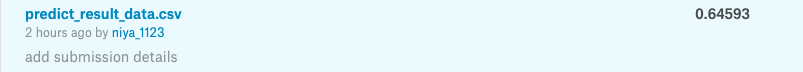

## 考察

この節では, 今回の手法の考察を行う.

### 学習方法について

今回の学習方法は線形回帰を用いたが, ロジスティック回帰を用いるとどうなるのか検証してみた.

In [7]:
from sklearn.linear_model import LogisticRegression
# warningが出るのでそれを表示させないためのもの.
import warnings
warnings.filterwarnings('ignore')
lr =LogisticRegression()
lr.fit(X_train,Y_train) # 学習
Y_pred = lr.predict(X_test) # 予測

In [8]:
import csv
with open("logistic_predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(int)):
        writer.writerow([pid, survived])

結果は以下のようになった.

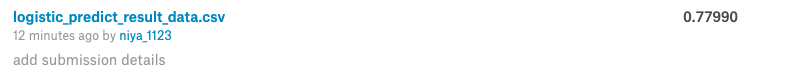



今回, 特に線形回帰でもロジスティック回帰でも特別なパラメタの設定はしていないので, 今回のデータセットにおいてはロジスティック回帰が線形回帰より適切な手法だったと考えられる.

### データについて

では, 次はデータについて考察する.
今回, 特徴として合計